# Выбор локации для скважины

**Импорт библиотек:**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np

import seaborn as sns

import phik

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  ( 
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

## Загрузка и подготовка данных

### Загрузка и предпросмотр

In [2]:
# функция для записи файла в датафрейм
def read_data(f_path, link, separator, decimal='.'):

    try:
        data = pd.read_csv(f_path, sep=separator, decimal=decimal)
    except:
        data = pd.read_csv(link, sep=separator, decimal=decimal)

    return data

Считаем все наши таблицы в датафреймы:

In [3]:
region_1 = read_data('datasets/geo_data_0.csv', 'geo_data_0.csv', ',')
region_2 = read_data('datasets/geo_data_1.csv', 'geo_data_1.csv', ',')
region_3 = read_data('datasets/geo_data_2.csv', 'geo_data_2.csv', ',')

Вспомогательная функция для предпросмотра:


In [4]:
# функция для ознакомления с таблицами
def observe_data(df):
    print('Превью таблицы (первые пять строк):\n')
    display(df.head())
    print('=' * 90)
    print('Информация о столбцах и типах данных:\n')
    df.info()
    print('=' * 90)
    print('Статистическая информация:\n')
    display(df.describe().T)

In [5]:
observe_data(region_1)

Превью таблицы (первые пять строк):



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Информация о столбцах и типах данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Статистическая информация:



,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [6]:
observe_data(region_2)

Превью таблицы (первые пять строк):



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Информация о столбцах и типах данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Статистическая информация:



,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [7]:
observe_data(region_3)

Превью таблицы (первые пять строк):



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Информация о столбцах и типах данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Статистическая информация:



,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Каждая таблица содержит информацию о 100 тыс. точек. Каждая точка это отдельное наблюдение. Характеристика точки(месторождения) включает в себя условные признаки *f0*, *f1*, *f2* и запасы нефти *product*. Все признаки представляют собой дробные числа. Кроме этого каждое месторождение обладает строковым идентификатором.

Проблем с таблицами на предпросмотре не выявлено.

### Предобработка данных

Строковый объект в наших таблицах только один, поэтому проверим на наличие дубликатов только столбец *id*:

In [8]:
len(region_1['id'].unique())

99990

In [9]:
region_1.shape

(100000, 5)

Видим, что в первой таблице есть повторяющиеся номера, посмотрим строки:

In [10]:
region_1.loc[region_1.duplicated('id', keep=False)]

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


Абсолютно нормальные значения, но *id* номера повторяться не могут, т.к. характеризуют разные месторождения. Вероятно возникла ошибка при формировании *id*. Чтобы в будущем не возникла путаница с идентификацией, переименуем дубли. Т.к. названия сгенирированы автоматически, чтобы не повторить номер, просто добавим порядковый номер к названию.

In [11]:
added_number = 0
for idx in region_1.loc[region_1.duplicated('id')].index:

    region_1.loc[region_1.index == idx, 'id'] = region_1.loc[region_1.index == idx, 'id'] + str(added_number)
    added_number += 1

In [12]:
len(region_1['id'].unique())

100000

Теперь все *id* уникальны. Аналогично поступим с оставшимися таблицами:

In [13]:
len(region_2['id'].unique())

99996

In [14]:
len(region_3['id'].unique())

99996

In [15]:
added_number = 0
for idx in region_2.loc[region_2.duplicated('id')].index:

    region_2.loc[region_2.index == idx, 'id'] = region_2.loc[region_2.index == idx, 'id'] + str(added_number)
    added_number += 1

In [16]:
added_number = 0
for idx in region_3.loc[region_3.duplicated('id')].index:

    region_3.loc[region_3.index == idx, 'id'] = region_3.loc[region_3.index == idx, 'id'] + str(added_number)
    added_number += 1

In [17]:
len(region_2['id'].unique())

100000

In [18]:
len(region_3['id'].unique())

100000

В ходе предобработки обнаружили дублирование в столбце *id*. Решили проблему переименованием. Других проблем данные не имеют и готовы к исследовательскому анализу.


### Исследовательский анализ данных

Таблицы имеют одинаковую структуру, все признаки, включая целевой - количественные. Можно сопоставить распределения значений на одном графике: 

In [19]:
def make_histogramm(ax, df, column, order):
    
    ax.hist(x=df[column], bins=30, edgecolor='black')
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    ax.set_title(f'Гистограмма распределения региона {order}')
    ax.set_xlabel('Значение признака')
    ax.set_ylabel('Количество наблюдений')

In [20]:
def make_boxplot(ax, df, column, order):
    
    ax.boxplot(df[column], vert=False)
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    ax.set_title(f'Диаграмма размаха региона {order}')
    ax.set_xlabel('Значение признака')

In [21]:
df_list = [region_1, region_2, region_3]

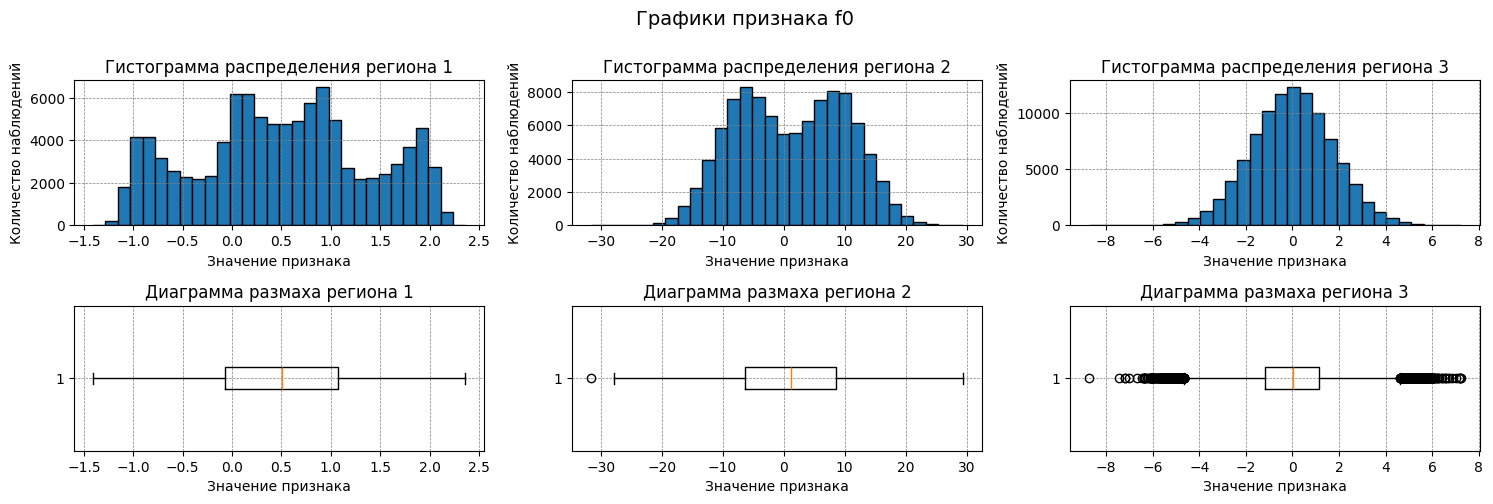

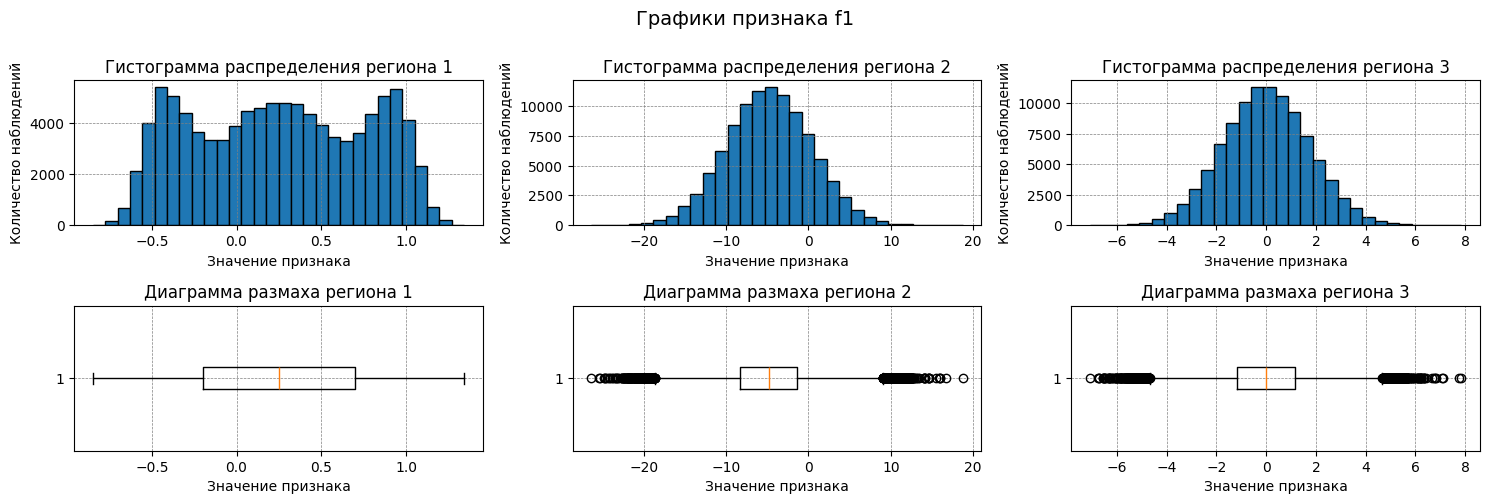

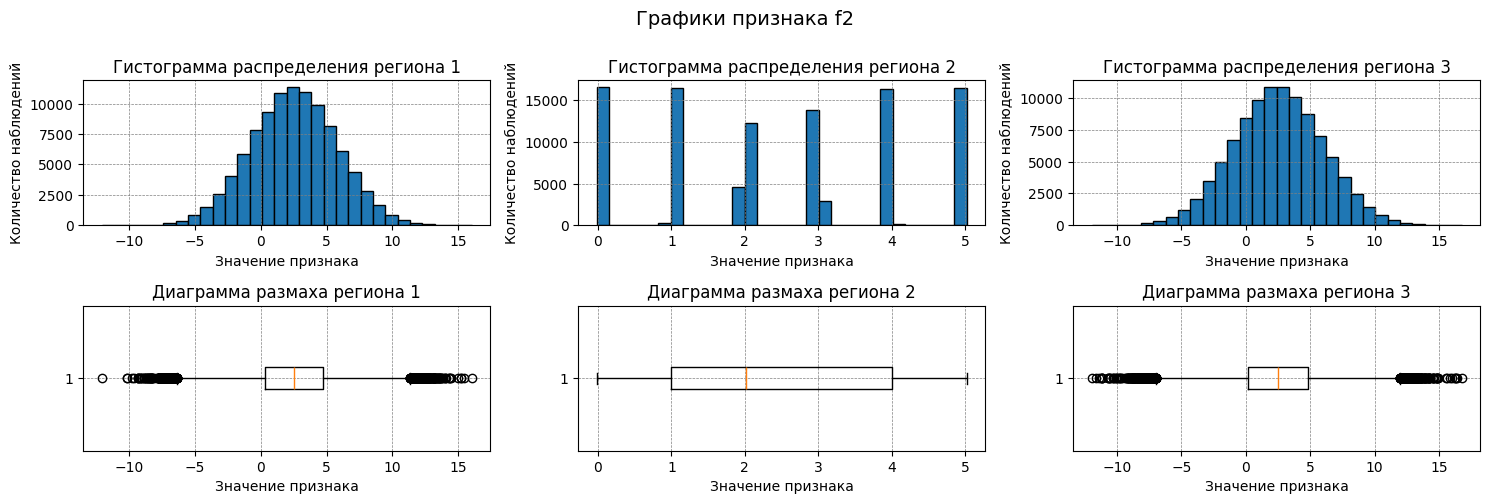

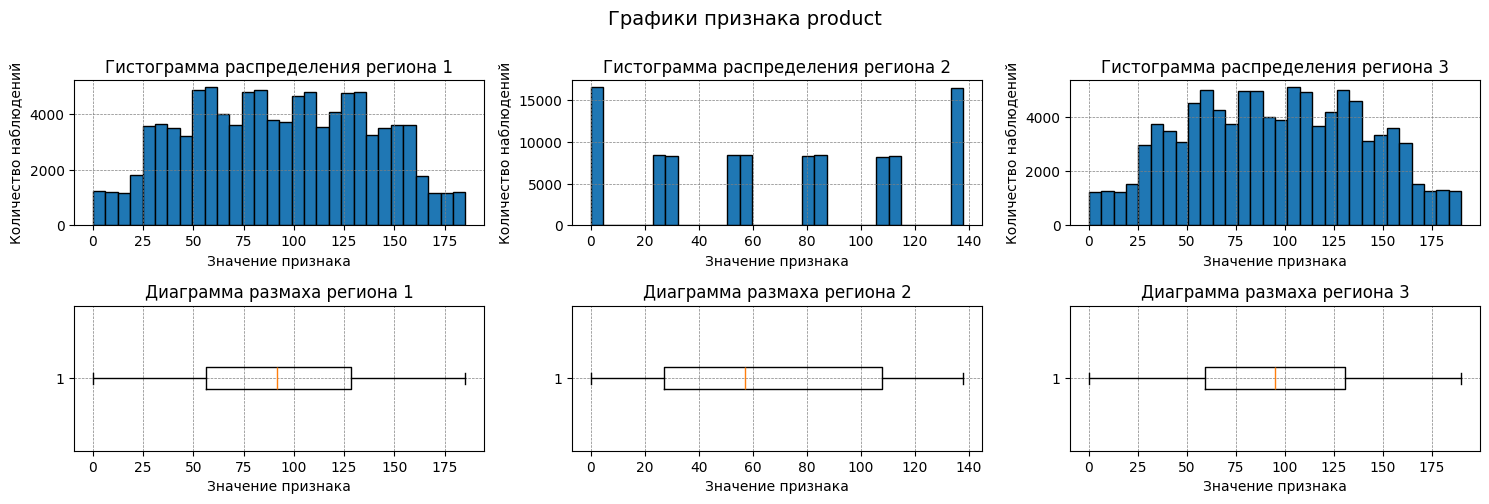

In [22]:
for column in region_1.drop('id', axis=1).columns:
    fig = plt.figure(figsize=(15, 5))
    gs = GridSpec(nrows=2, ncols=3, figure=fig)
    plt.suptitle(f'Графики признака {column}', va='center', fontsize=14)
    
    for i, df in enumerate(df_list):
        
        ax = fig.add_subplot(gs[0,i])
        make_histogramm(ax, df, column, i+1)
        ax = fig.add_subplot(gs[1,i])
        make_boxplot(ax, df, column, i+1)

    plt.tight_layout()
    plt.show()

+ По первому признаку *f0* выделим, что нормально распределено только в третьем регионе, но на диаграмме размаха фиксируем много выбросов. Остальные регионы имеют бимодальное распределение (2 регион) и полимодальное (1 регион).
+ Признак *f1* распределен нормально во втором и третьем регионах, но с большим числом выбросов. В первом регионе распределение полимодальное.
+ Признак *f2* имеет нормальное распределение в первом и третьем регионах с выбросами на диаграмме размаха. Во втором регионе видим кластеризацию признака.
+ По общим запасам нефти в месторождениях можно сказать, что в среднем месторождения с наибольшими запасами находятся в третьем регионе. В первом и третьем достаточно большая вариативность распределния признака, наблюдаем несколько мод. Во втором регионе видим сильную кластеризацию: признак сконцентрирован около значений: 0, 25, 55, 85, 110, 135, причем больше всего наблюдений на крайних значениях диапазона.

Теперь взглянем на связь между признаками с помощью графиков рассеивания:

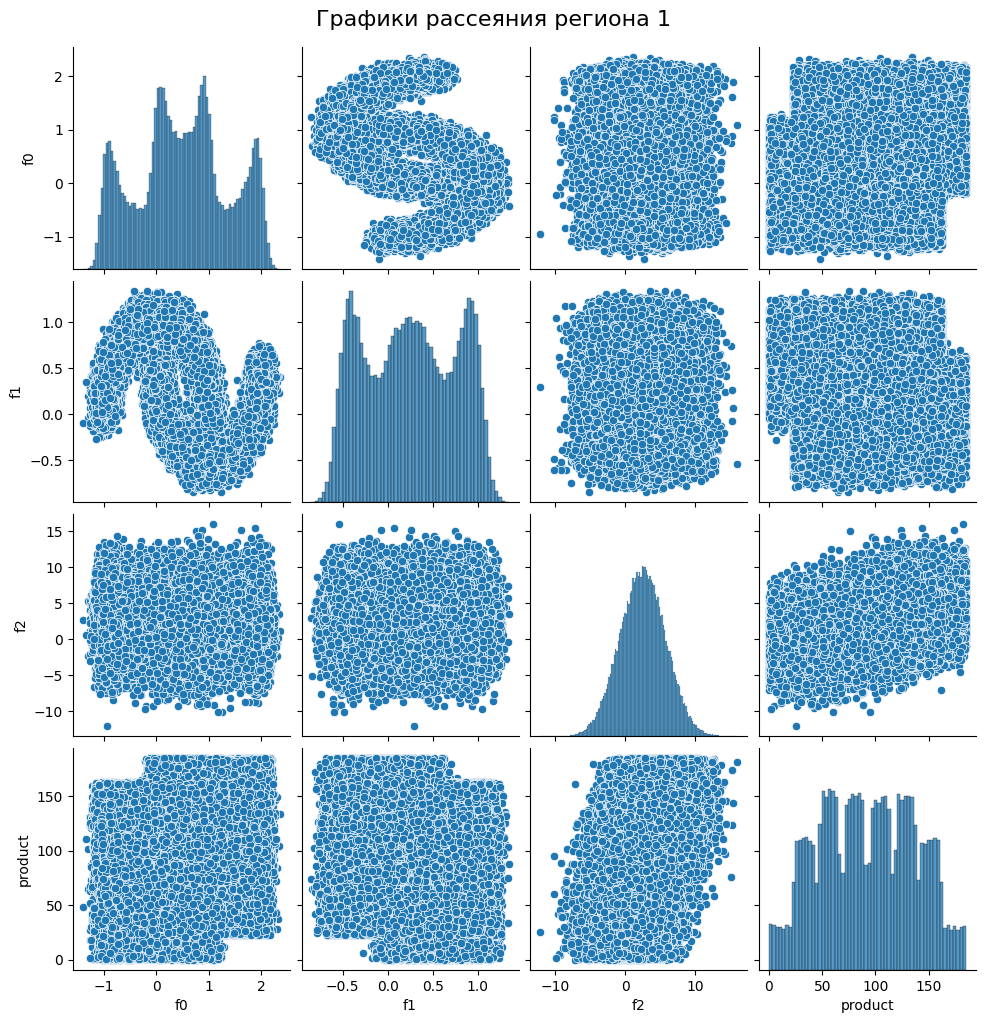

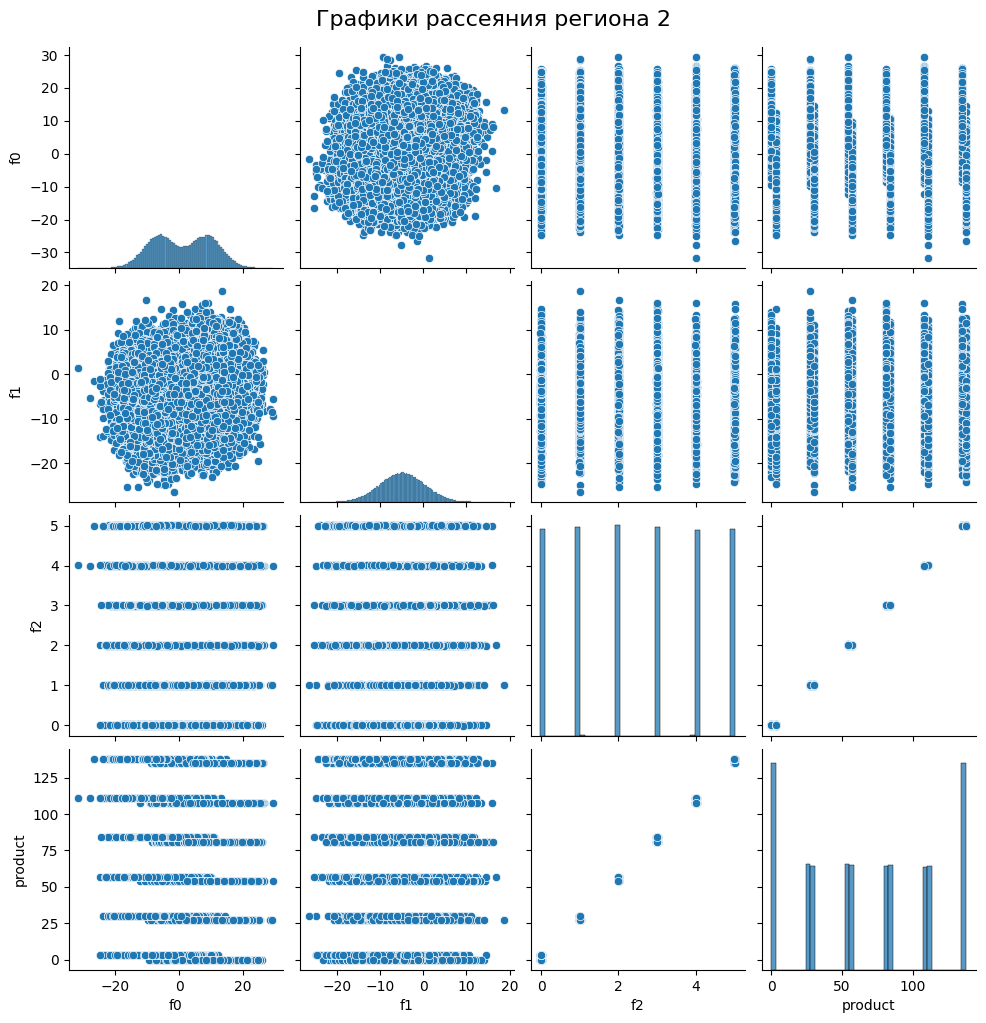

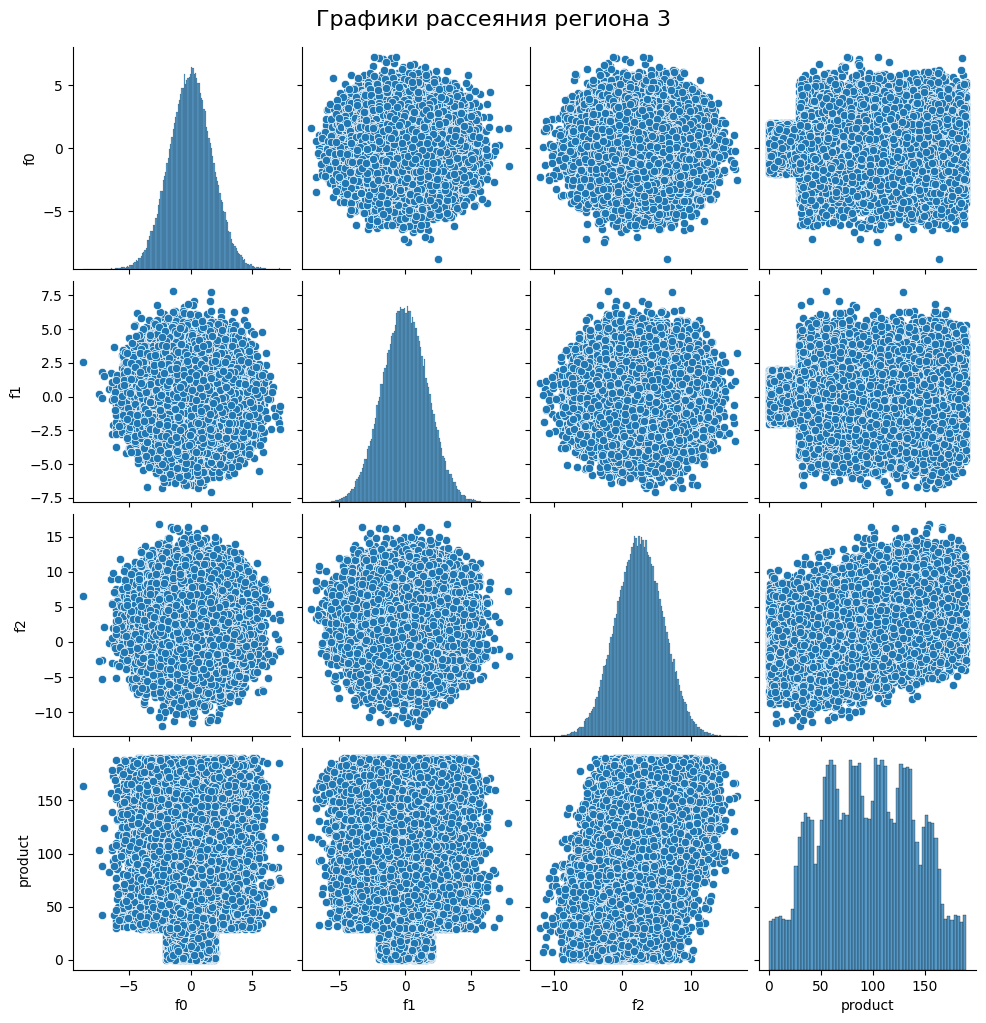

In [23]:
for num, df in enumerate(df_list):
    sns.pairplot(df, vars=df.drop('id', axis=1))
    plt.suptitle(f'Графики рассеяния региона {num+1}', y=1.02, fontsize=16)
    plt.show()

В данной задаче целевым признаком является *product*, посмотрим на связи между входными и целевым признаком в разных регионах:
+ **Регион 1**: целевой признак линейно связан только с f2, остальные признаки между собой имеют нелинейные связи.
+ **Регион 2**: также отметим выраженную линейную связь между целевым и признаком f2, остальные признаки имеют кластеризацию или квадратичную взаимосвязь.
+ **Регион 3**: аналогично остальным - линейно связаны целевой признак и f2, остальные - нелинейно.

На основании данных выводов и наличия выбросов будем вычислять коэффициенты корреляции с помощью подхода Phik.

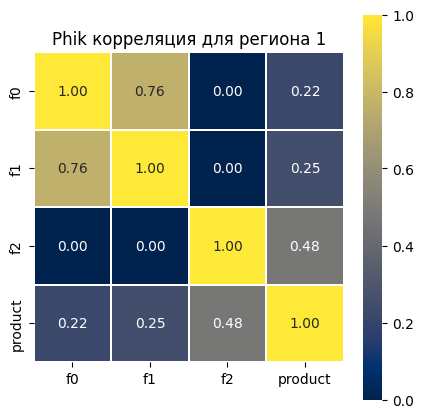

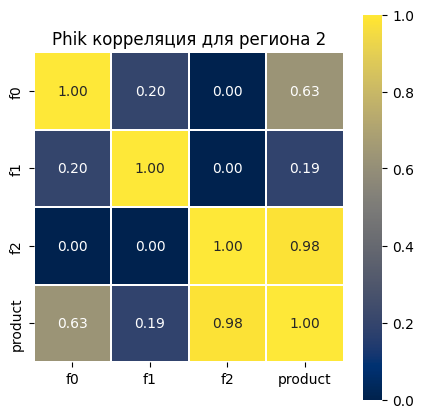

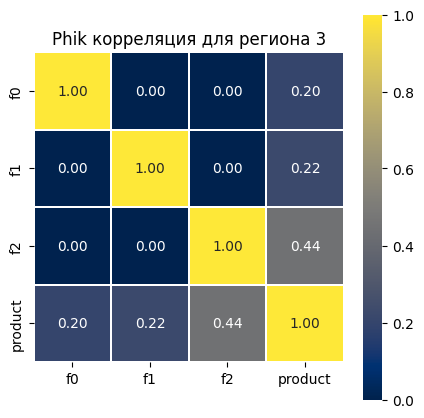

In [24]:
# визуализация коэффициентов корреляции
for num, df in enumerate(df_list):
    figsize = (5, 5)
    fig = plt.subplots(figsize=figsize)
    plt.title(f'Phik корреляция для региона {num+1}')
    sns.heatmap(df
                .drop('id', axis=1)
                .phik_matrix(interval_cols=df.drop('id', axis=1).columns), 
                annot=True, cmap='cividis', 
                linewidth=0.1,
                fmt='.2f',
                square=True)
    plt.show()

Согласно корреляционному анализу в регионах 1 и 3 не установлены признаки с высокой корреляцией. Однако в регионе 2 мы видим, что сила связи между таргетом и *f2* достаточно высока (корреляция 0.98). Ранее мы это заметили и на диаграмме рассеивания. Сам признак отличается от такого же признака в других регионах необычным распределением, значения которого находятся в определенных диапозонах, когда как в остальных регионах этот признак распределен нормально и имеет больший размах.

**Вывод:**

Предоставленные данные мы загрузили и сделали анализ. Каждый полученный датафрейм представляет информацию об одном регионе. Все таблицы имеют одинаковую структуру и состоят из таргета *product* и количественных входных признаков *f0, f1, f2*.

В исходных данных были найдены дублирующие id, которые мы переименовали.

Исследовательский анализ выявил:
+ не все признаки распределены нормально;
+ некоторые имеют выбросы;
+ сильная кластеризация признака *f2* второго региона;
+ целевой признак имеет выраженную линейную связь только с признаком *f2*;
+ причем эта линейная связь имеет большую силу согласно коэффициенту корреляции между рассматриваемыми признаками (0.98);
+ остальные признаки не имеют сильной корреляции.

## Обучение и проверка модели

### Подготовка PipeLine

Т.к. у нас несколько идентичных таблиц, воспользуемся PipeLine для автоматической подготовки данных и создания регрессионой модели.

In [25]:
RANDOM_STATE = 13

Столбцы для всех таблиц буду одинаковые:

In [26]:
num_columns = region_1.drop(['id', 'product'], axis=1).columns

Разобьем данные для первого региона:

In [27]:
X = region_1.drop(['product'], axis=1)
y = region_1['product']

X_train, X_test_reg1, y_train, y_test_reg1 = train_test_split(
X, 
y, 
random_state=RANDOM_STATE
)

Признаки все количественные, поэтому будем преобразовывать данные в один этап - масштабирование:

In [28]:
data_preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [29]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', LinearRegression())
    ]
)

Кроме классической модели LinearRegression, попробуем Ridge и Lasso с разными значениями силы регуляции alpha и разными подходами маштабирования:

In [30]:
param_grid = [
    {
        'model': [LinearRegression()],
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough'
        ],
    },
    
    {
        'model': [Ridge()],
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough'
        ],
        'model__alpha': [0.1, 1, 10, 100]
    },
    
    {
        'model': [Lasso()],
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler(),
            'passthrough'
        ],
        'model__alpha': [0.1, 1, 10, 100]
    }
    
]

Переберем все возможные комбинации, в качестве метрики выберем RMSE:

In [31]:
best_model_reg1 = GridSearchCV(
    pipe_final,
    param_grid=param_grid, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
)

best_model_reg1.fit(X_train.drop('id', axis=1), y_train)
print('Лучшая модель и её параметры:\n\n', best_model_reg1.best_estimator_)
print('Метрика RMSE для лучшей модели:\n', best_model_reg1.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['f0', 'f1', 'f2'], dtype='object'))])),
                ('model', Ridge(alpha=1))])
Метрика RMSE для лучшей модели:
 -37.694000006783696


Самой лучшей оказалась модель Ridge с дефолтным alpha = 1 и подготовкой данных с помощью MinMaxScaler. Посмотрим, как проявили себя другие модели:

In [32]:
# установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)

In [33]:
result_reg1 = pd.DataFrame(best_model_reg1.cv_results_).sort_values('rank_test_score')
result_reg1[['rank_test_score', 'param_model', 'mean_test_score','params']].head(15)

,rank_test_score,param_model,mean_test_score,params
9,1,Ridge(),-37.694000,"{'model': Ridge(), 'model__alpha': 1, 'preprocessor__num': MinMaxScaler()}"
5,2,Ridge(),-37.694004,"{'model': Ridge(), 'model__alpha': 0.1, 'preprocessor__num': MinMaxScaler()}"
14,3,Ridge(),-37.694005,"{'model': Ridge(), 'model__alpha': 10, 'preprocessor__num': RobustScaler()}"
15,4,Ridge(),-37.694005,"{'model': Ridge(), 'model__alpha': 10, 'preprocessor__num': 'passthrough'}"
12,5,Ridge(),-37.694005,"{'model': Ridge(), 'model__alpha': 10, 'preprocessor__num': StandardScaler()}"
10,6,Ridge(),-37.694006,"{'model': Ridge(), 'model__alpha': 1, 'preprocessor__num': RobustScaler()}"
11,7,Ridge(),-37.694006,"{'model': Ridge(), 'model__alpha': 1, 'preprocessor__num': 'passthrough'}"
8,8,Ridge(),-37.694006,"{'model': Ridge(), 'model__alpha': 1, 'preprocessor__num': StandardScaler()}"
6,9,Ridge(),-37.694006,"{'model': Ridge(), 'model__alpha': 0.1, 'preprocessor__num': RobustScaler()}"
7,10,Ridge(),-37.694006,"{'model': Ridge(), 'model__alpha': 0.1, 'preprocessor__num': 'passthrough'}"


Можем заметить, что в пределе топ-15 модель и гиперпараметры практически не имеют влияние на результат. Т.е. нам подойдет как Ridge так LinearModel. 

Если нет существенной разницы между моделями и способом подготовки данных, выберем вариант, который базово указан в *pipe_final*: модель - LinearRegression, стандартизация с помощью StandartScale:

In [34]:
pipe_final.fit(X_train.drop('id', axis=1), y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Получим предсказанные данные и оценим различными метриками:

In [35]:
# получение предсказаний
predictions_reg1 = pipe_final.predict(X_test_reg1.drop('id', axis=1))

# рассчет метрик
print('Основные метрики модели:')

r2_reg1 = r2_score(y_test_reg1, predictions_reg1)
print("R2 LinearRegression =", r2_reg1)

mse_reg1 = mean_squared_error(y_test_reg1, predictions_reg1)
print("MSE =", mse_reg1)

rmse_reg1 = mse_reg1 ** 0.5
print("RMSE =", rmse_reg1)

mae_reg1 = mean_absolute_error(y_test_reg1, predictions_reg1)
print("MAE =", mae_reg1)

Основные метрики модели:
R2 LinearRegression = 0.2748211315201472
MSE = 1420.8789002297854
RMSE = 37.69454735409069
MAE = 31.008550751783346


Метрика R2 говорит о том, что в 27% случаев предсказание модели точнее, чем среднее значение целевого признака. MAE нам говорит, что в среднем предсказания отклоняются на 31, при среднем значении таргета 92.5.

Проанализируем ошибки, совершаемые моделью, для этого создадим вспомогательную функцию:

In [36]:
def analyze_residuals(y_test, predictions):
    
    ''' Функция строит гистограмму распределения остатков и график распределения остатков.
        На входе принимает тестовый и расчетный целевой показатели.'''
    print('Анализ остатков')
    print('=' * 80)
    residuals = y_test - predictions

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].hist(residuals)
    axes[0].grid(True)
    axes[0].set_title('Гистограмма распределения остатков', fontsize=16)
    axes[0].set_xlabel('Остатки')
    axes[0].set_ylabel('Количество наблюдений')

    axes[1].scatter(y=residuals, x=predictions)
    axes[1].grid(True)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии', fontsize=16)
    
    plt.tight_layout()
    plt.show()

Анализ остатков


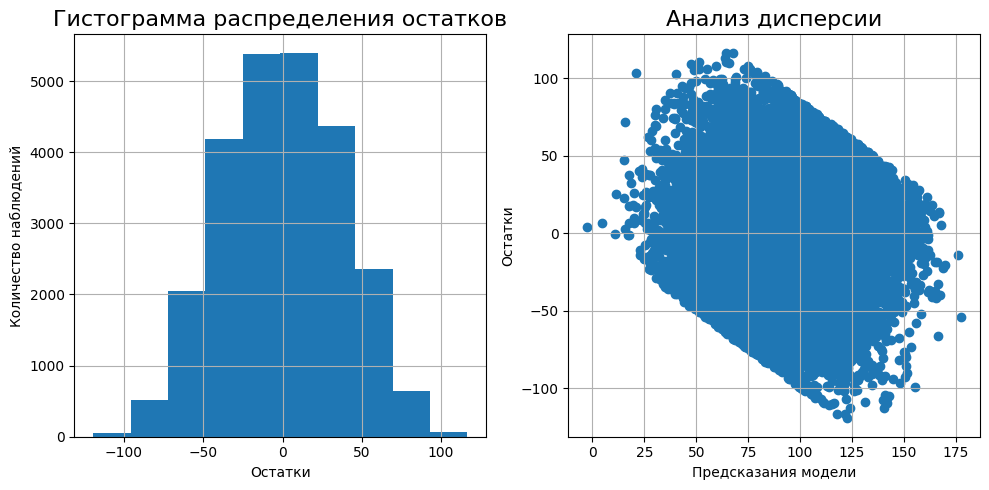

In [37]:
# анализ остатков
analyze_residuals(y_test_reg1, predictions_reg1)

Видим, что ошибки распределены нормально и симметрично. Характерный ромб в дисперсии остатков указывает на то, что модель не до конца улавливает связи. Отметим, что пик положительных ошибок находится в диопазоне 50-75 предсказанного значения *product*, т.е. таргет максимально занижен. Пик отрицательных - 100-125, таргет здесь максимально завышен в некоторых случаях. 

In [38]:
mean_product_reg1 = predictions_reg1.mean()

Аналогично получим предсказания для второго региона:


In [39]:
X = region_2.drop(['product'], axis=1)
y = region_2['product']

X_train, X_test_reg2, y_train, y_test_reg2 = train_test_split(
X, 
y, 
random_state=RANDOM_STATE
)

pipe_final.fit(X_train.drop('id', axis=1), y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Основные метрики модели:
R2 LinearRegression = 0.9996233207312256
MSE = 0.7988722588308341
RMSE = 0.8937965421900188
MAE = 0.7199001055406401
Анализ остатков


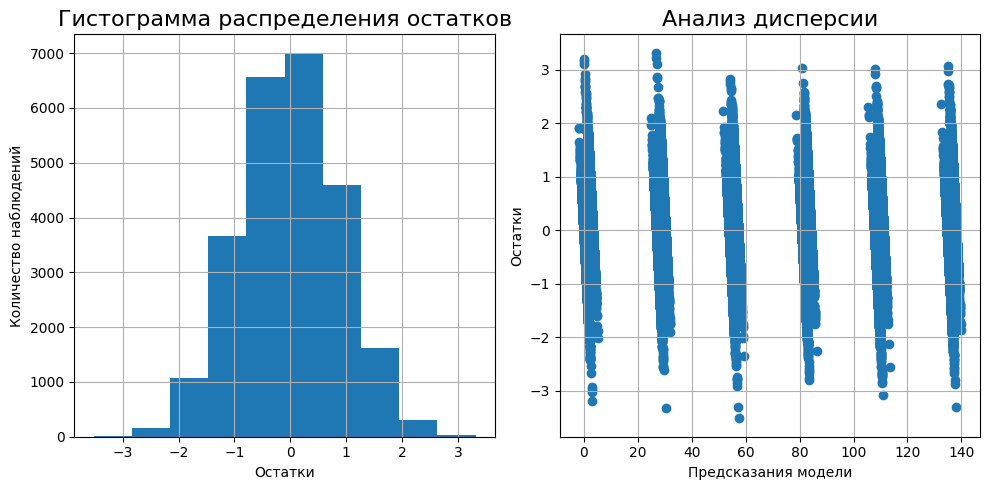

In [40]:
predictions_reg2 = pipe_final.predict(X_test_reg2.drop('id', axis=1))

# рассчет метрик
print('Основные метрики модели:')

r2_reg2 = r2_score(y_test_reg2, predictions_reg2)
print("R2 LinearRegression =", r2_reg2)

mse_reg2 = mean_squared_error(y_test_reg2, predictions_reg2)
print("MSE =", mse_reg2)

rmse_reg2 = mse_reg2 ** 0.5
print("RMSE =", rmse_reg2)

mae_reg2 = mean_absolute_error(y_test_reg2, predictions_reg2)
print("MAE =", mae_reg2)

# анализ остатков
analyze_residuals(y_test_reg2, predictions_reg2)

Обученная модель на данных второго региона, напротив, показывает отличные результаты на валидации: R2 указывает на почти идеально верные предсказания, остальные метрики говорят, что модель отклоняется не больше чем на 1 в своих предсказаниях.

Остатки распределны симметрично и нормально. В дисперсии видим кластеризацию благодаря признаку *f2*, который имеет самый большой вес в предсказании.

In [41]:
mean_product_reg2 = predictions_reg2.mean()

И для третьего региона:

In [42]:
X = region_3.drop(['product'], axis=1)
y = region_3['product']

X_train, X_test_reg3, y_train, y_test_reg3 = train_test_split(
X, 
y, 
random_state=RANDOM_STATE
)

pipe_final.fit(X_train.drop('id', axis=1), y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Основные метрики модели:
R2 LinearRegression = 0.19939447143962952
MSE = 1601.7472607068928
RMSE = 40.021834799355375
MAE = 32.755053018732
Анализ остатков


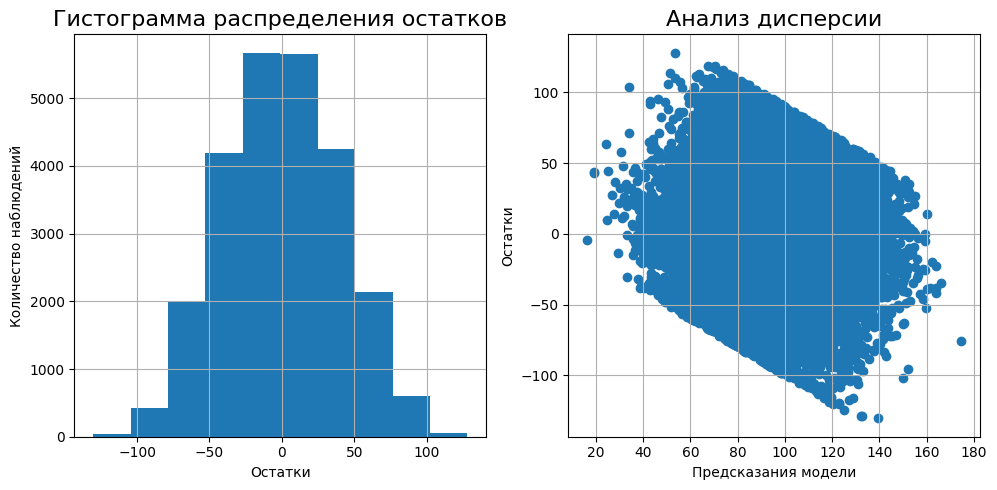

In [43]:
predictions_reg3 = pipe_final.predict(X_test_reg3.drop('id', axis=1))

# рассчет метрик
print('Основные метрики модели:')

r2_reg3 = r2_score(y_test_reg3, predictions_reg3)
print("R2 LinearRegression =", r2_reg3)

mse_reg3 = mean_squared_error(y_test_reg3, predictions_reg3)
print("MSE =", mse_reg3)

rmse_reg3 = mse_reg3 ** 0.5
print("RMSE =", rmse_reg3)

mae_reg3 = mean_absolute_error(y_test_reg3, predictions_reg3)
print("MAE =", mae_reg3)

# анализ остатков
analyze_residuals(y_test_reg3, predictions_reg3)
mean_product_reg3 = predictions_reg3.mean()

Судя по метрикам модель, обученная на данных третьего региона, получилась самая слабая: модель отрабатывает только около 20% всех наблюдений, при этом имеет в среднем отклонение около 33 от истинных значений. 

Остатки нормально распределны. Дисперсия также как и в первом регионе говорит о том, что модель не полностью улавливает все связи.

Создадим табличку со всеми метриками моделей и средним значением предсказанного таргета:

In [44]:
model_results = pd.DataFrame(
    {
       'name': ['region_1', 'region_2', 'region_3'],
        'r_2': [r2_reg1, r2_reg2, r2_reg3],
        'mse': [mse_reg1, mse_reg2, mse_reg3],
        'rmse': [rmse_reg1, rmse_reg2, rmse_reg3],
        'mae': [mae_reg1, mae_reg2, mae_reg3],
        'mean_prediction': [mean_product_reg1, mean_product_reg2, mean_product_reg3]
    }
)
model_results

,name,r_2,mse,rmse,mae,mean_prediction
0,region_1,0.274821,1420.878900,37.694547,31.008551,92.594320
1,region_2,0.999623,0.798872,0.893797,0.719900,69.029492
2,region_3,0.199394,1601.747261,40.021835,32.755053,94.956202


**Вывод:**

В данном разделе мы построили модель линейной регрессии для предсказания целевого количественного признака. При выборе модели с помощью метрики RMSE из всех рассматриваемых моделей: LinearReggression, Ridge, Lasso и способов нормализации входных признаков метрика практически не отличалась. Выбрали базовый вариант: LinearRegression и StandartScaler. 

Далее мы обучали модель и делали предсказания для каждого региона отдельно. В результате можно сказать, что данная модель практически идеально отрабатывает для второго региона: почти все наблюдения предсказаны верно, в остальных корень из средней квалратичной ошибки не превышает 0.9 тыс. баррелей. По итогам среднее значение запасов месторождения в регионе - 69 тыс. баррелей.

Однако модель не так успешно делает предсказания для оставшихся регионов. В первом регионе модель лишь в 27% предсказаний вернее определяет чем статистические величины и в случае ошибки в среднем отклоняется на 31 тыс. барелей. Среднее значение в местрождении равно 92.6 тыс. баррелей. 

В третьем регионе модель успешна лишь в 20% наблюдений со средней ошибкой 32.7 тыс. баррелей. Месторождение там содержит в среднем около 95 тыс. баррелей.

Несмотря на то, что среднее значение предсказаний второго региона ниже, но в первом и третьем регионе модель может сильно завысить или занизить прогнозное значение.

## Подготовка к расчёту прибыли

Вначале рассчитаем, сколько должно содержаться нефти в месторождении для безубыточной разработки. Запишем исходные данные:


In [45]:
# общий бюджет на регион
BUDGET = 10_000_000_000

# количество исследуемых точек
INVESTIGATED_POINTS = 500

# количество разрабатываемых месторождений в регионе
FIELD_NUM = 200

# расходы на разработку одного месторождения
expenses_per_field = BUDGET / FIELD_NUM

# доход с одной единицы product
INCOME_PER_FIELD = 450_000

# средний требуемый запас месторождения
mean_req_product = BUDGET / (INCOME_PER_FIELD * FIELD_NUM)
round(mean_req_product, 2)

111.11

Из-за отсутсвия данных можем рассчитывать только валовую прибыль. Чтобы получить валовую прибыль неотрицательную, необходимо разрабатывать месторождения с запасами не менее 111.1 тыс. баррелей. Из средних показателей, предсказанных моделью, ни один регион не имеет таких средних значений. 

Для того, чтобы иметь доступ к самим месторождениям(т.е. к *id*), истинным значениям и предсказанным, создадим таблицу, содержащие все эти данные: 

In [46]:
region_1_predicted = X_test_reg1.copy()
region_1_predicted['product_pred'] = predictions_reg1
region_1_predicted['product_true'] = y_test_reg1
region_1_predicted.head(2)

,id,f0,f1,f2,product_pred,product_true
72031,c5Qsm,0.344571,-0.272941,-2.099642,68.927415,170.053522
27978,894L2,1.652531,-0.206616,1.868818,99.176667,61.453092


In [47]:
region_2_predicted = X_test_reg2.copy()
region_2_predicted['product_pred'] = predictions_reg2
region_2_predicted['product_true'] = y_test_reg2
region_2_predicted.head(2)

,id,f0,f1,f2,product_pred,product_true
72031,Z5kmk,2.404544,1.392635,3.003099,82.215551,80.859783
27978,SQVIe,7.863461,-3.074607,4.994210,135.186645,134.766305


In [48]:
region_3_predicted = X_test_reg3.copy()
region_3_predicted['product_pred'] = predictions_reg3
region_3_predicted['product_true'] = y_test_reg3
region_3_predicted.head(2)

,id,f0,f1,f2,product_pred,product_true
72031,u8iV1,-0.370020,0.667530,-4.538057,54.556699,76.447828
27978,3v9dH,1.525227,-4.025469,1.634140,90.189453,60.054617


## Расчёт прибыли и рисков 

Для расчета реальной валовой прибыли напишем функцию:

In [49]:
def calculate_gross_profit(product_true, product_pred):
    """Функция на входе принимает реальные данные и предсказанные.
    На основании топ-200 предсказанных месторождений используем
    соответствующие им реальные значения, чтобы вычислить
    валовую прибыль. Фунцкия возвращает суммарную для всего
    региона прибыль.
    """
    
    top_200_fields = product_pred.sort_values(ascending=False)
    selected = product_true[top_200_fields.index][:FIELD_NUM]
    gross_profit = selected.sum() * INCOME_PER_FIELD - BUDGET

    return gross_profit

In [50]:
predicted_dfs = [region_1_predicted, region_2_predicted, region_3_predicted]

С помощью boostrap сформируем 1000 выборок для вычисления валовой прибыли для каждой из них. Чтобы потом получить среднее значение прибыли, доверительный интервал и оценку риска убытков для каждого региона.

In [51]:
list_of_profits = []

for num, df in enumerate(predicted_dfs):
    state = np.random.RandomState(17)

    product_true = df['product_true']
    product_pred = df['product_pred']

    profits = []
    for _ in range(1000):
        
        product_true_subsample = product_true.sample(INVESTIGATED_POINTS, replace=True, random_state=state)
        product_pred_subsample = product_pred[product_true_subsample.index]
        
        product_true_subsample.reset_index(drop = True, inplace=True)
        product_pred_subsample.reset_index(drop = True, inplace=True)
        
        profits.append(calculate_gross_profit(product_true_subsample, product_pred_subsample))
        
   
    
    profits = pd.Series(profits)
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    risk = (profits < 0).mean()
    mean = profits.mean()
    
    list_of_profits.append(profits)
    
    print('-' * 90)
    print('Показатели для Региона', num+1)
    print(f'Средняя валовая прибыль: {mean/1e6:.2f} млн. руб.')
    print(f'95%-доверительный интервал: от {lower / 1e6:.2f} млн. руб. до {upper / 1e6:.2f} млн. руб.')
    print(f'Риск убытков: {risk:.2%}')

------------------------------------------------------------------------------------------
Показатели для Региона 1
Средняя валовая прибыль: 439.19 млн. руб.
95%-доверительный интервал: от -105.10 млн. руб. до 928.96 млн. руб.
Риск убытков: 5.60%
------------------------------------------------------------------------------------------
Показатели для Региона 2
Средняя валовая прибыль: 477.19 млн. руб.
95%-доверительный интервал: от 52.49 млн. руб. до 869.39 млн. руб.
Риск убытков: 0.80%
------------------------------------------------------------------------------------------
Показатели для Региона 3
Средняя валовая прибыль: 370.99 млн. руб.
95%-доверительный интервал: от -132.89 млн. руб. до 847.35 млн. руб.
Риск убытков: 8.20%


Визуализируем полученнные распределения прибыли всех регионов на одном графике:

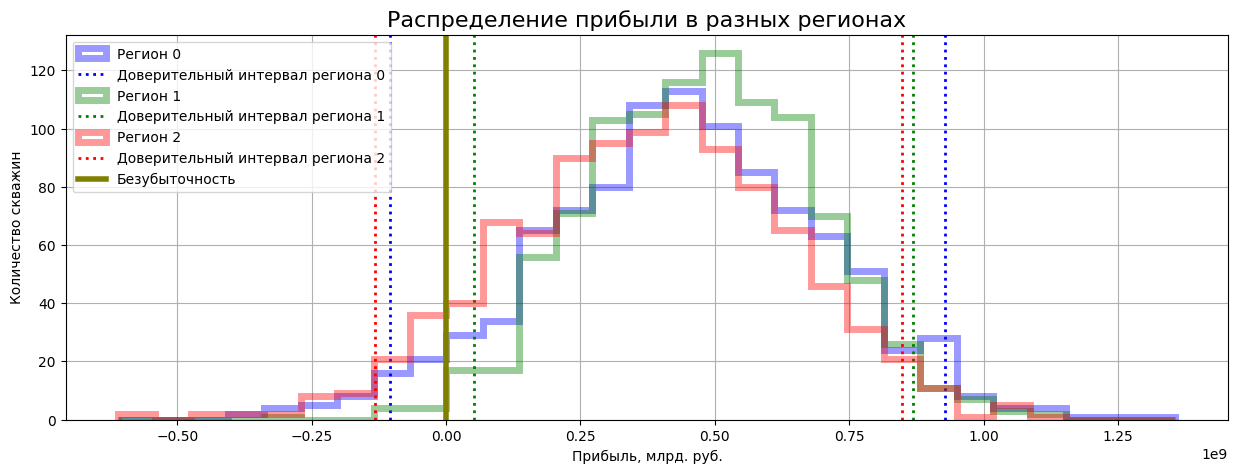

In [52]:
minimum = min(profit.min() for profit in list_of_profits)
maximum = max(profit.max() for profit in list_of_profits)
bins_num = 30

fig = plt.figure(figsize=(15, 5))
list_of_colors = ['blue', 'green', 'red']
for i, region_profit in enumerate(list_of_profits):
    
    region_profit.hist(histtype='step',
                       color=list_of_colors[i], 
                       linewidth=5, 
                       bins=np.linspace(minimum, maximum, bins_num),
                       alpha=0.4,
                       label=f'Регион {i}'
                      )
    
    plt.axvline(x=region_profit.quantile(0.025), 
                color=list_of_colors[i], linestyle=':', 
                linewidth=2, 
                label=f'Доверительный интервал региона {i}'
               )
    
    plt.axvline(x=region_profit.quantile(0.975), 
            color=list_of_colors[i], linestyle=':', 
            linewidth=2
           )
    
plt.axvline(x=0, color='olive', linestyle='-', linewidth=4, label='Безубыточность')
plt.xlabel('Прибыль, млрд. руб.')
plt.ylabel('Количество скважин')
plt.title('Распределение прибыли в разных регионах', fontsize=16)
plt.legend(loc=2)
plt.show()                 

Из все трех регионов единственным с положительным доверительным интервалом и риском убытков, меньшим 2.5% является второй. Несмотря на то, что это регион с наименьшими средними запасами, все же высокая успешность модели снижает риски ошибиться до приемлемых. Поэтому рекомендацию для разработки можно дать только для второго региона.

## Общий вывод


Главной задачей проекта является определение региона, в котором можно вести разработку наиболее богатых нефтяных месторождений с риском получения убытка менее 2.5%. Для этого необходимо создать модель, которая на основании признаков, характеризующих месторождение и полученных в ходе геологоразведки, позволяет прогнозировать запасы в этом месторождении. Обладая информацией и потенциальных запасах не трудно оценить убыточность или, напротив, перспективность точки.

Для этого были исследованы данные трех разных регионов. Среди предоставленной информации выделили целевой признак запасов сырья в месторождении *product* и входные признаки, характеризующие качество нефти *f0, f1, f2*. Данные не содержали критических ошибок, лишь небольшое число строк имели одинаковые *id*, которые были просто переименованы. 

В ходе исследовательского анализа были выявлены отличия выборок регионов. Отличительной особенностью второго региона стала сильная кластеризация признака *f2* и линейно с ним связанного таргета. Такого не наблюдается в остальных регионах. Помимо этого не все данные распределны нормально, некоторые признаки имеют выбросы. Касательно связ между признаками, то с таргетом линейно связан только признак *f2*, остальные имеют другую связь. Высокая кластеризация, линейность связи все это отразилось в высокой корреляции между целевым признаком и *f2* (0.98) во втором регионе, подчеркивая его выраженные предикаторские свойства для модели.

Задача предсказания количественного признака это задача линейной регрессии. Поэтому среди моделей были рассмотрены LinearRegression, Ridge, Lasso модели. На основании перебора разных моделей и способов нормализации входных признаков было установлено, что максимальные показатели всех моделей практически идентичны. Не повлияли на результат и способы нормализации. В качестве модели была выбрана самая простая - LinearRegression с нормализацией StandartScaler. 

По результатам моделирования можно сказать, что данная модель практически идеально отрабатывает для второго региона: почти все наблюдения предсказаны верно, в остальных корень из средней квалратичной ошибки не превышает 0.9 тыс. баррелей. По итогам среднее значение запасов месторождения в регионе - 69 тыс. баррелей. Однако модель не так успешно делает предсказания для оставшихся регионов. В первом регионе модель лишь в 27% предсказаний вернее определяет чем статистические величины и в случае ошибки в среднем отклоняется на 31 тыс. барелей. Среднее значение в местрождении равно 92.6 тыс. баррелей. В третьем регионе модель успешна лишь в 20% наблюдений со средней ошибкой 32.7 тыс. баррелей. Месторождение там содержит в среднем около 95 тыс. баррелей.

Наконец, получив прогнозные данные, мы смогли рассчитать прибыль каждого месторождения, просуммировав это, получили информацию о целом рассматриваемом регионе. Согласно условиям сумма бюджета на разработку 200 месторождений равна 10 млрд. руб. С учетом прибыли с каждой тысячи баррелей добытой нефти 450 тыс. руб неубыточное месторождение должно содержать от 111.1 тыс. баррелей сырья. Это значение превышает средние значения по региону, как реальные так и прогнозные. Отклоняясь от среднего значения нормального распределения понижается вероятность по его достижения, а значит риск получить значение ниже целевого будет выше. 

Выделив 200 наиболее богатых месторождений согласно полученному прогнозу, просуммировали реальные значения, чтобы оценить валовую прибыль предсказанных точек. Для оценки использовали 95% доверительный интервал, который позволит нам с 95% уверенностью сказать, что в среднем месторождение не будет убыточным. Единственным регионом с положительным интервалом стал второй, риск понести убытки в котором составляет 0.6%. Остальные регионы имеют неприемлемый риск выше 2.5%. Поэтому финальной рекомендацией является, что разработку месторождений целесообразно вести на основании полученных данных только во втором регионе. 

Также стоит рассмотреть особенность добытой информации о признаке *f2* второго региона, который стал определяющим в предсказании запасов нефти. Возможно добавление новых признаков месторождений позволят построить более точную модель для первого и третьего регионов. Потому что потенциал по запасам они имеют больший, главным минусом является плохая отработка модели на данных этих регионов.